In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

No missing values detected.
Features and labels separated successfully.
Data split into training and testing sets.
LDA transformation completed with 11 components.
Explained Variance Ratio for each component:
Component 1: 0.3314 (33.14%)
Component 2: 0.2175 (21.75%)
Component 3: 0.1539 (15.39%)
Component 4: 0.1246 (12.46%)
Component 5: 0.0706 (7.06%)
Component 6: 0.0445 (4.45%)
Component 7: 0.0257 (2.57%)
Component 8: 0.0185 (1.85%)
Component 9: 0.0071 (0.71%)
Component 10: 0.0038 (0.38%)
Component 11: 0.0025 (0.25%)


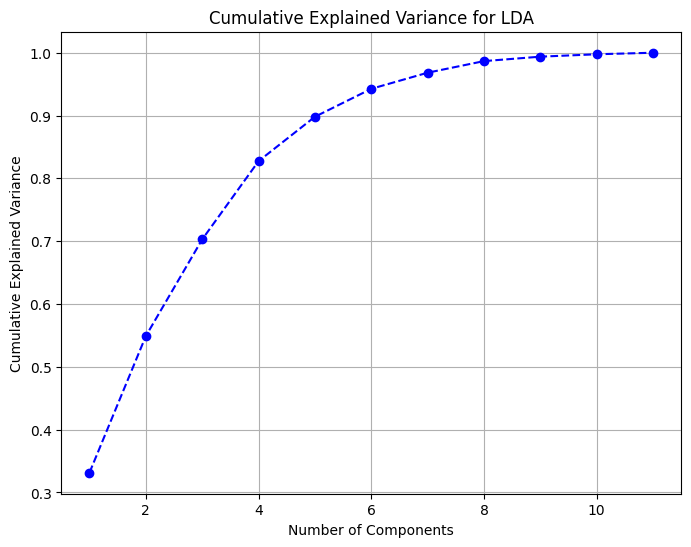

LDA results saved to 'LDA_results.csv'.


In [6]:
# Load the dataset
file_path = 'scaled_hand_angles.csv'
data = pd.read_csv(file_path)

# Check for missing values and handle them
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")


# Separate features and labels
if 'target' in data.columns:
    features = data.drop(columns=['target'])  # Assuming the 'label' column represents the target variable
    labels = data['target']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the file contains a 'label' column.")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")


num_classes = len(np.unique(y_train))
max_components = min(features.shape[1], num_classes - 1)  # LDA components limit
lda = LDA(n_components=max_components)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
print(f"LDA transformation completed with {max_components} components.")


# Explained variance ratio for each component
explained_variance_ratio = lda.explained_variance_ratio_
print("Explained Variance Ratio for each component:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"Component {i + 1}: {variance:.4f} ({variance * 100:.2f}%)")



# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance for LDA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()



# Save LDA-transformed data for inspection (optional)
lda_df = pd.DataFrame(data=X_train, columns=[f'LDA{i + 1}' for i in range(X_train.shape[1])])
lda_df['target'] = y_train.values
lda_df.to_csv('LDA.csv', index=False)
print("LDA results saved to 'LDA_results.csv'.")